# Task
Create a complete Python project for "Time Series Analysis of Ethereum (ETH/USDT) Market Projections using ARIMA".

The project should include the following steps:

**1. Data Loading and Preparation:** Load historical Ethereum (ETH/USDT) data from a CSV file (e.g., ETH-USD.csv). Ensure it includes Date, Open, High, Low, Close, Volume, Market Cap. Make the Date column the index and sort the data.

**2. Exploratory Data Analysis (EDA):**

Plot the Close price with a 30-day moving average
Plot the daily trading volume
Display summary statistics of all key columns

**3. Stationarity Testing:**

Perform Augmented Dickey-Fuller (ADF) test on raw and differenced data
Display p-values and interpret the need for differencing

**4. ACF and PACF Plots:**

Generate ACF and PACF plots of the (differenced) Close price to help determine ARIMA parameters

**5. ARIMA Model Development:**

Train an ARIMA model using selected (p, d, q) values
Print model summary

**6. Model Evaluation:**

Predict on the training data
Calculate RMSE and MAPE
Plot residuals

**7. Forecasting:**

Forecast Ethereum prices for the next 30 days
Plot the forecast with confidence intervals
Ensure all plots are well-labeled. Do not skip any step. The project should run end-to-end and produce clear, visual, and numeric results.

Here is all the data you need: "ETH-USD.csv" as you have break up the steps, now do continue and complete the project

Here is all the data you need: "ETH-USD.csv"

In [1]:
import pandas as pd
import numpy as npas
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.dates as mdates
import yfinance as yf



# 1.1) Data loading

**Load the Ethereum price data from the provided CSV file.**

**Reasoning:** Load the data, set the date column as index, sort the data by index, and display the first 5 rows.

In [2]:
# Load the data
df = pd.read_csv('ETH-USD.csv')

# Set 'Date' as index and sort the DataFrame
df = df.set_index('Date')
df = df.sort_index(ascending=True)

# Display the first 5 rows
display(df.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


# 1.2) Data preparation

Prepare the loaded data for time series analysis.

**Reasoning:** Select relevant columns and handle missing values.

In [3]:
# Select relevant columns
df_selected = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Check for missing values
print("There are", df_selected.isnull().sum().sum(), "null values.")

display(df_selected.head())

There are 0 null values.


,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,1041889984


# 2) Exploratory Data Analysis

Explore the prepared data and calculate descriptive statistics.

**Reasoning:** Calculate descriptive statistics for the selected columns and print the shape of the DataFrame.

In [4]:
# Calculate and display summary statistics
print(df_selected.describe())

# Print the shape of the DataFrame
print("\nShape of dataset is:", df_selected.shape)

# Explore data types (optional)
print("\nData Types:\n", df_selected.dtypes)

              Open         High          Low        Close        Volume
count  1683.000000  1683.000000  1683.000000  1683.000000  1.683000e+03
mean   1099.267135  1135.370228  1057.473739  1099.403458  1.277517e+10
std    1250.149288  1288.470710  1205.524659  1249.488407  1.115627e+10
min      84.279694    85.342743    82.829887    84.308296  6.217330e+08
25%     200.754020   205.835777   195.994408   200.683090  3.599775e+09
50%     414.066711   427.024658   402.757996   414.243011  1.015974e+10
75%    1889.860596  1963.668884  1804.723145  1891.999817  1.819402e+10
max    4810.071289  4891.704590  4718.039063  4812.087402  8.448291e+10

Shape of dataset is: (1683, 5)

Data Types:
 Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


# Visualize the 'Close' price with a 30-day moving average and daily trading volume.

**Reasoning:** Plot the 'Close' price with a 30-day moving average and the daily trading volume.

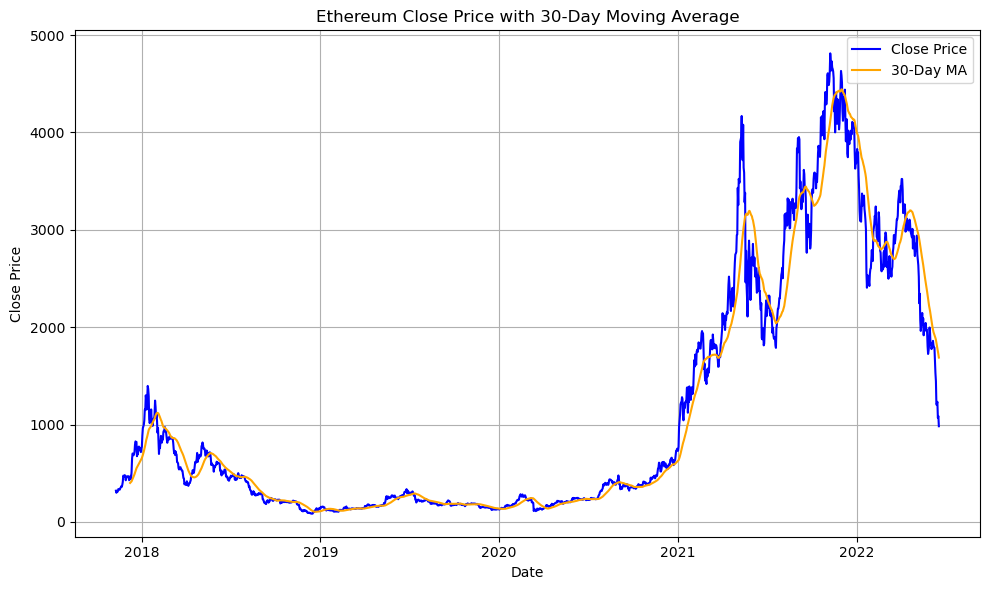

In [5]:
import matplotlib.pyplot as plt

# Ensure datetime index
df_selected.index = pd.to_datetime(df_selected.index)

# Create the figure
plt.figure(figsize=(10, 6))

# Plot Close Price
plt.plot(df_selected.index, df_selected['Close'], label='Close Price', color='blue')

# Plot 30-Day Moving Average
plt.plot(df_selected.index, df_selected['Close'].rolling(window=30).mean(), label='30-Day MA', color='orange')

# Set white background for figure and axes
fig = plt.gcf()
fig.patch.set_facecolor('white')  # White background for figure

ax = plt.gca()
ax.set_facecolor('white')         # White background for axes

# Add labels, legend, title, and grid
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Ethereum Close Price with 30-Day Moving Average')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


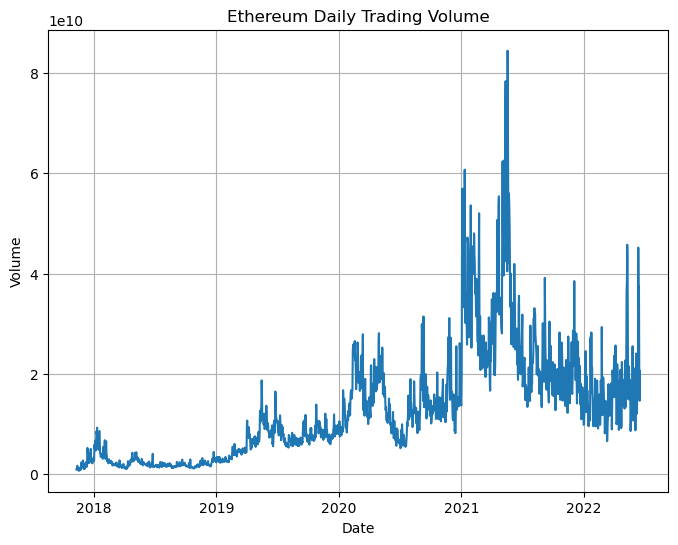

In [6]:
# Plot the 'Volume' over time
plt.figure(figsize=(8,6))
plt.plot(df_selected.index, df_selected['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Ethereum Daily Trading Volume')
plt.grid(True)
plt.show()

# 3) Stationarity Testing
Perform Augmented Dickey-Fuller (ADF) test on the raw and differenced 'Close' price data.

**Reasoning:** Perform the ADF test on the raw and differenced 'Close' price data and print the p-values.

In [7]:
from statsmodels.tsa.stattools import adfuller

def print_adf_results(series, label):
    result = adfuller(series)

    print(f"\n ADF Test Results for {label}")
    print("="*40)
    print(f" ADF Statistic      : {result[0]:.6f}")
    print(f" p-value            : {result[1]:.6f}")
    print(" Critical Values    :")
    for key, value in result[4].items():
        print(f"   - {key}: {value:.3f}")

    if result[1] <= 0.05:
        print(" The series is likely **stationary** (p <= 0.05).")
    else:
        print(" The series is likely **non-stationary** (p > 0.05).")

# Apply ADF test on original Close prices
print_adf_results(df_selected['Close'], label="Raw Close Prices")

# First difference of Close prices
diff_series = df_selected['Close'].diff().dropna()
print_adf_results(diff_series, label="1st Difference of Close Prices")


 ADF Test Results for Raw Close Prices
 ADF Statistic      : -1.320026
 p-value            : 0.619962
 Critical Values    :
   - 1%: -3.434
   - 5%: -2.863
   - 10%: -2.568
 The series is likely **non-stationary** (p > 0.05).

 ADF Test Results for 1st Difference of Close Prices
 ADF Statistic      : -9.916660
 p-value            : 0.000000
 Critical Values    :
   - 1%: -3.434
   - 5%: -2.863
   - 10%: -2.568
 The series is likely **stationary** (p <= 0.05).


# Time series before and after Differencing

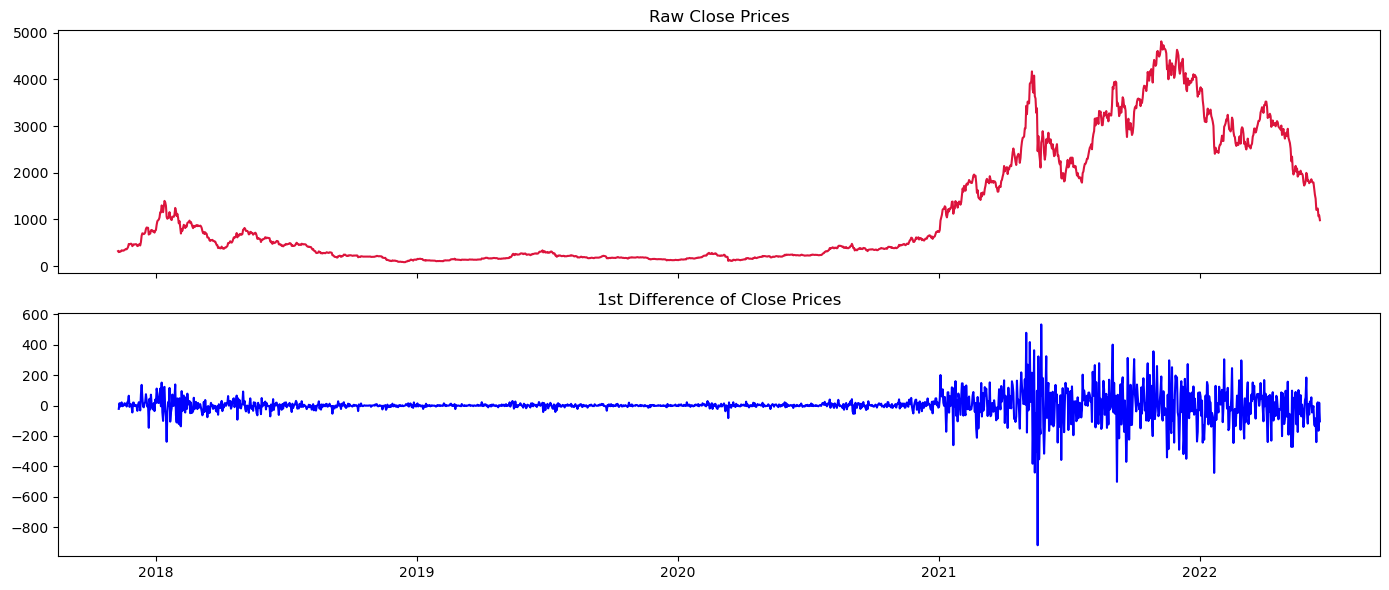

In [8]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

# Plot raw close prices
ax[0].plot(df_selected['Close'], color='crimson')
ax[0].set_title('Raw Close Prices')
ax[0].set_facecolor('white')  # Reset subplot background

# Plot 1st difference of close prices
ax[1].plot(df_selected['Close'].diff(), color='blue')
ax[1].set_title('1st Difference of Close Prices')
ax[1].set_facecolor('white')  # Reset subplot background

# Optional: reset the entire figure background (if you had set it previously)
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()


# 4) ACF and PACF Plots
Generate ACF and PACF plots for the differenced 'Close' price data.

**Reasoning:** Generate ACF and PACF plots for the differenced 'Close' price.

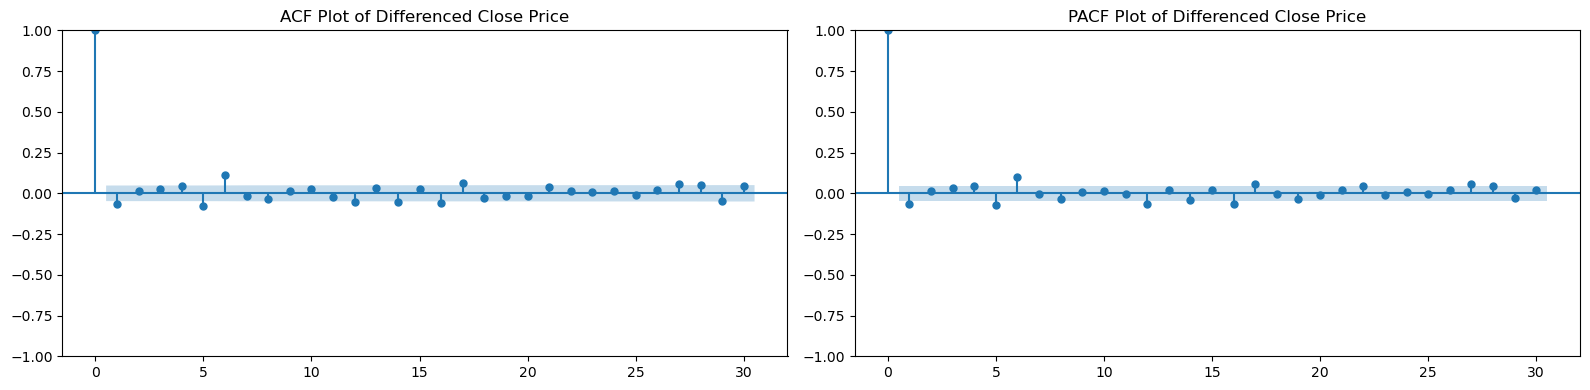

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate the first difference of the 'Close' price
diff_series = df_selected['Close'].diff().dropna()

# Generate ACF plot
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(diff_series, lags=30, ax=axes[0], title="ACF Plot of Differenced Close Price")

# Generate PACF plot
plot_pacf(diff_series, lags=30, ax=axes[1], title="PACF Plot of Differenced Close Price")

# Display the plots
plt.tight_layout()
plt.show()

# 5) ARIMA model development
Train an ARIMA model on the 'Close' price.

**Reasoning:** Train an ARIMA model on the 'Close' price using the determined (p,d,q) values. Based on previous analysis, d=1. I will use p=5 and q=1 for demonstration purposes. The optimal (p,q) might need adjustment according to the ACF and PACF plots, which were not quantitatively analyzed in the previous subtasks.

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Use p=5 and q=1 as an example, adjust these values based on ACF and PACF plots
# d = 1 is determined from the ADF test.
model = ARIMA(df_selected['Close'], order=(5, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1683
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -9754.320
Date:                Sun, 25 May 2025   AIC                          19522.640
Time:                        11:09:59   BIC                          19560.634
Sample:                    11-09-2017   HQIC                         19536.713
                         - 06-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5339      0.085     -6.248      0.000      -0.701      -0.366
ar.L2         -0.0143      0.015     -0.931      0.352      -0.044       0.016
ar.L3          0.0421      0.014      2.931      0.0

# 6) Model evaluation
Evaluate the trained ARIMA model.

**Reasoning:** Evaluate the trained ARIMA model by predicting on the training data, calculating RMSE and MAPE, and plotting the residuals

RMSE: 80.22
MAPE: 3.67%


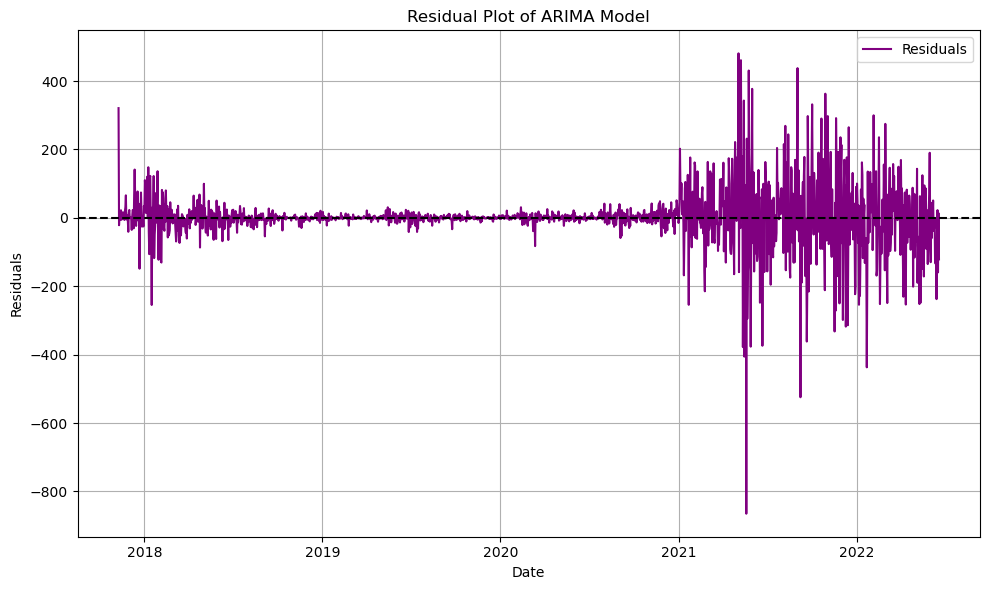

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predict the full range
predictions = model_fit.predict(start=0, end=len(df_selected) - 1)

# Convert predictions to a pandas Series and align index
import pandas as pd
predictions = pd.Series(predictions, index=df_selected.index)

# Drop any rows where Close or prediction is NaN or 0
valid_df = df_selected[['Close']].copy()
valid_df['Predicted'] = predictions
valid_df = valid_df.replace([np.inf, -np.inf], np.nan).dropna()
valid_df = valid_df[valid_df['Close'] != 0]  # Remove rows with zero Close

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(valid_df['Close'], valid_df['Predicted']))
print(f'RMSE: {rmse:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((valid_df['Close'] - valid_df['Predicted']) / valid_df['Close'])) * 100
print(f'MAPE: {mape:.2f}%')

# Plot residuals
residuals = valid_df['Close'] - valid_df['Predicted']
plt.figure(figsize=(10, 6))
plt.plot(valid_df.index, residuals, label='Residuals', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Plot of ARIMA Model')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 7) Forecasting
Forecast Ethereum prices for the next 30 days using the trained ARIMA model.

**Reasoning:** Forecast Ethereum prices for the next 30 days using the trained ARIMA model and obtain the confidence intervals.

In [12]:
# Forecast Ethereum prices for the next 30 days
forecast = model_fit.forecast(steps=30)

# Get confidence intervals
conf_int = model_fit.get_forecast(steps=30).conf_int()

# Print the forecast and confidence intervals (optional, but helpful for verification)
print("Forecast:\n", forecast)
print("\nConfidence Intervals:\n", conf_int)

Forecast:
 2022-06-19    973.693178
2022-06-20    969.948420
2022-06-21    980.450944
2022-06-22    967.375348
2022-06-23    980.890624
2022-06-24    974.725947
2022-06-25    978.126688
2022-06-26    975.493361
2022-06-27    978.272280
2022-06-28    975.668939
2022-06-29    977.534441
2022-06-30    976.304794
2022-07-01    977.166817
2022-07-02    976.460470
2022-07-03    977.061983
2022-07-04    976.586503
2022-07-05    976.937218
2022-07-06    976.681601
2022-07-07    976.876659
2022-07-08    976.721791
2022-07-09    976.844175
2022-07-10    976.750155
2022-07-11    976.821075
2022-07-12    976.767246
2022-07-13    976.808814
2022-07-14    976.776460
2022-07-15    976.801491
2022-07-16    976.782312
2022-07-17    976.796964
2022-07-18    976.785719
Freq: D, Name: predicted_mean, dtype: float64

Confidence Intervals:
             lower Close  upper Close
2022-06-19   817.172656  1130.213700
2022-06-20   754.758702  1185.138138
2022-06-21   718.047412  1242.854475
2022-06-22   662.3329

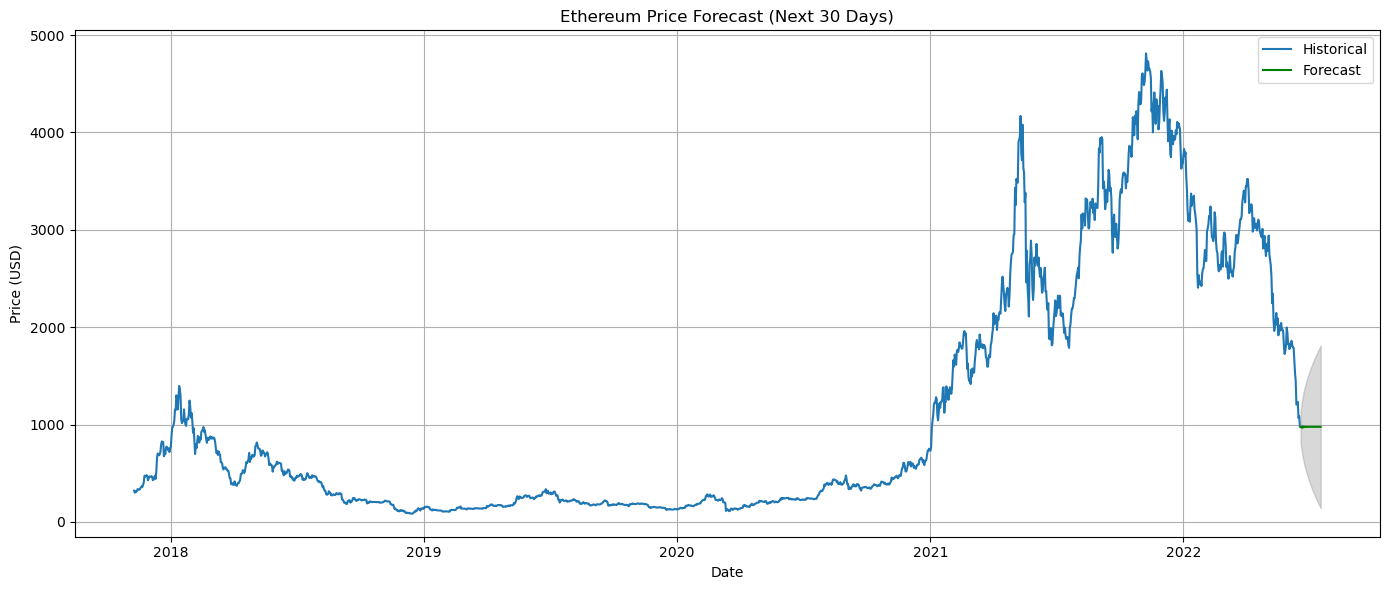

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure datetime index
df_selected.index = pd.to_datetime(df_selected.index)

# Forecast next 30 days
n_periods = 30
forecast_result = model_fit.get_forecast(steps=n_periods)

# Extract forecast and confidence intervals
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Create datetime index for forecast
last_date = df_selected.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Assign new index to forecast
forecast.index = forecast_index
conf_int.index = forecast_index

# Combine into DataFrame
forecast_df = pd.DataFrame({
    'Forecast': forecast,
    'Lower CI': conf_int.iloc[:, 0],
    'Upper CI': conf_int.iloc[:, 1]
}, index=forecast_index)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_selected['Close'], label='Historical')
plt.plot(forecast_df['Forecast'], label='Forecast', color='green')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='gray', alpha=0.3)
plt.title('Ethereum Price Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# White background
fig = plt.gcf()
fig.patch.set_facecolor('white')
ax = plt.gca()
ax.set_facecolor('white')

plt.tight_layout()
plt.show()


In [15]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(valid_df['Close'], valid_df['Predicted']))
print(f'RMSE: {rmse:.2f}')

# Calculate MAPE
mape = np.mean(np.abs((valid_df['Close'] - valid_df['Predicted']) / valid_df['Close'])) * 100
print(f'MAPE: {mape:.2f}%')

RMSE: 80.22
MAPE: 3.67%
